In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
#Reading data, saving it to Pandas DataFrame 'df'
df = pd.read_csv('/Users/otto/GitHub repos/AML/MALL2/Mall_Customers.csv')

In [224]:
#Displaying the first 20 lines of the DataFrame
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


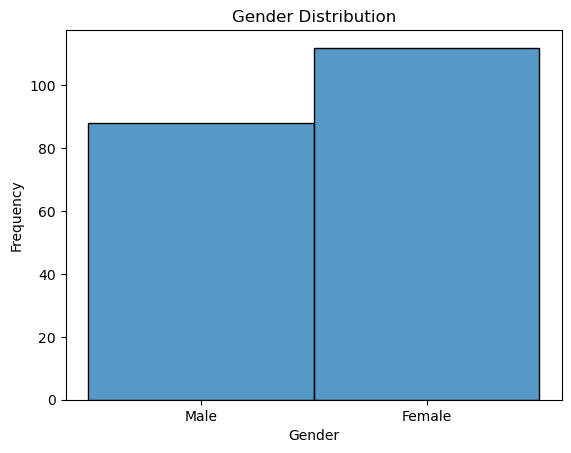

In [226]:
#Create a histogram from the values in the "Gender" column of the DataFrame

sns.histplot(df['Gender'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.show()

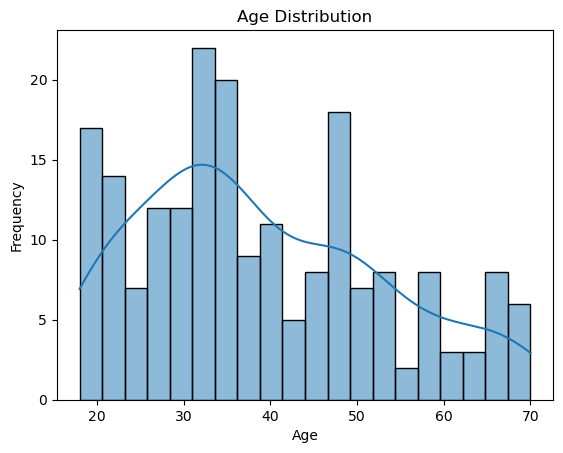

In [227]:
#Create a histogram from the values in the "Age" column of the DataFrame
#Includes a Kernel Density Estimate curve on the histogram
#Specified to use 20 bins for dividing the columns of the histogram

sns.histplot(df['Age'], kde=True, bins=20)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

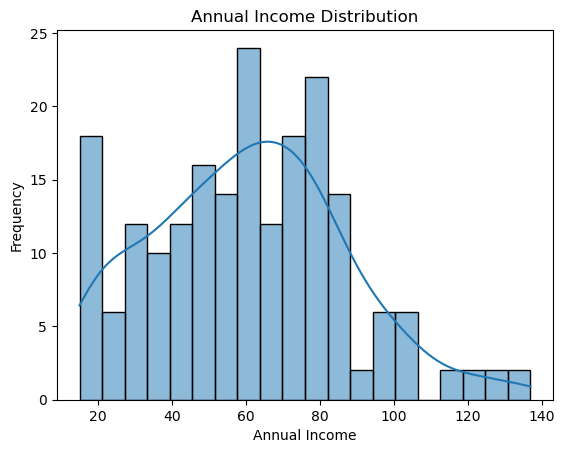

In [228]:
#Create a histogram from the values in the "Annual Income (k$)" column of the DataFrame
#Includes a Kernel Density Estimate curve on the histogram
#Specified to use 20 bins for dividing the columns of the histogram

sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)

plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.show()

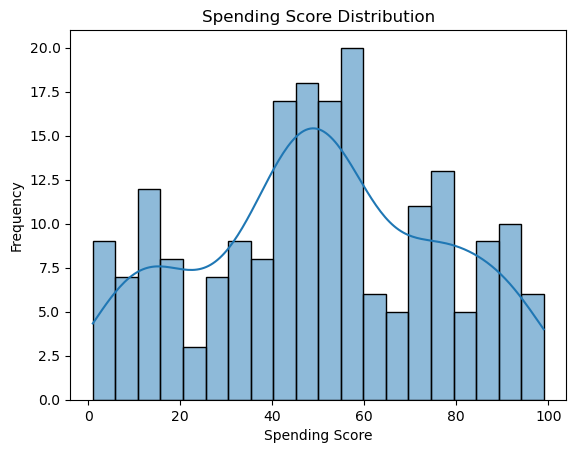

In [229]:
#Create a histogram from the values in the "Spending Score (1-100)" column of the DataFrame
#Includes a Kernel Density Estimate curve on the histogram
#Specified to use 20 bins for dividing the columns of the histogram

sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)

plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.show()

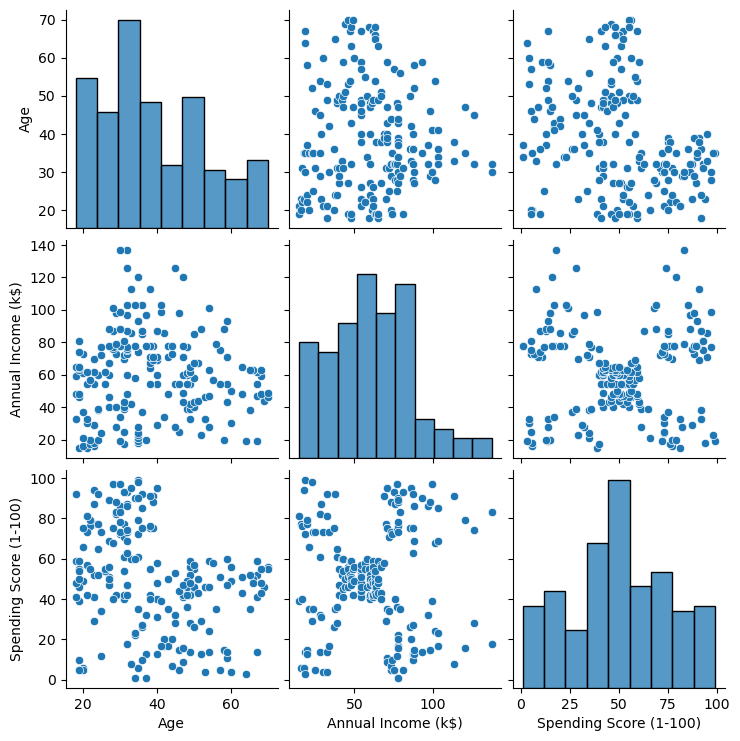

In [230]:
#Creating a pairplot from all the columns containing numerical values in the dataset

sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

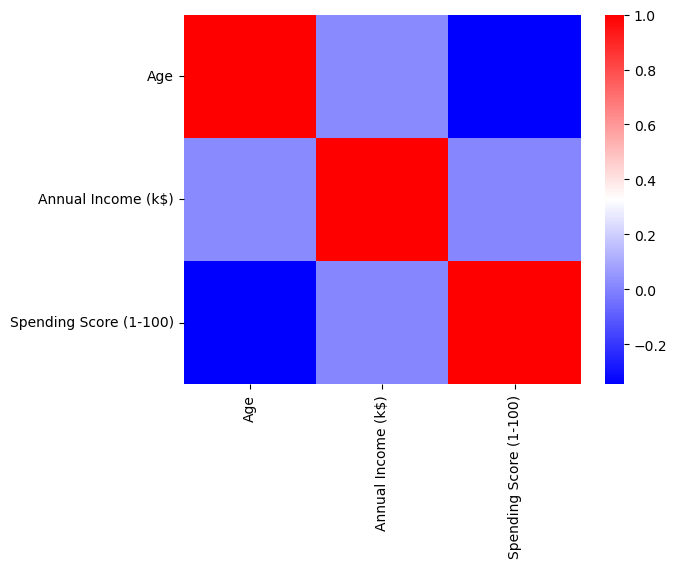

In [231]:
#Selecting Age, Annual Income and Spending Score from df and saving them to a new DataFrame 'numeric_columns'
numeric_columns = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#Computing a correlation matrix on the numeric_columns DataFrame
corr_matrix = numeric_columns.corr(method='spearman')

#Plotting a heatmap from the correlation matrix
sns.heatmap(corr_matrix, cmap='bwr')

plt.show()

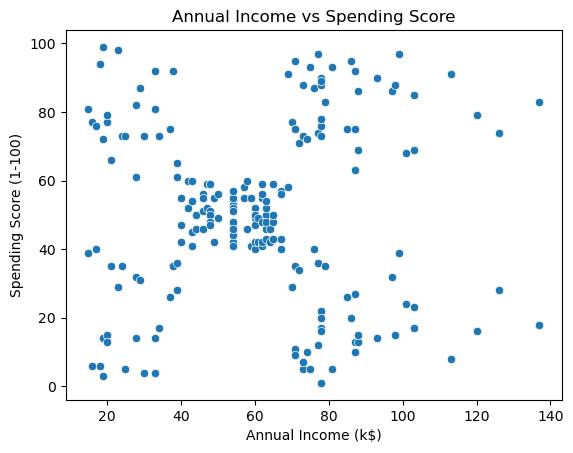

In [232]:
#Scatterplot of the Spending Score and Annual Income columns

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data = df)

plt.title('Annual Income vs Spending Score')

plt.show()

K-means Clustering

In [233]:
from sklearn.cluster import KMeans

In [234]:
#Creating a new DataFrame 'AI_SS' containing the Annual Income and Spending Score data
AI_SS = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#Converting the DataFrame to a numpy array
AI_SS = AI_SS.to_numpy()

In [235]:
#Apply K-means clustering
kmeans = KMeans(n_clusters=5)  # 5 clusters because the above Annual Income vs Spending Score plot seems to have 5 distinct clusters
kmeans.fit(AI_SS)

# Predict cluster labels for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Save the cluster centroids and labels
kmeanscentroids = kmeans.cluster_centers_
kmeanslabels = kmeans.labels_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [236]:
#Create a mesh grid for decision boundary
x_min, x_max = AI_SS[:, 0].min() - 1, AI_SS[:, 0].max() + 1
y_min, y_max = AI_SS[:, 1].min() - 1, AI_SS[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

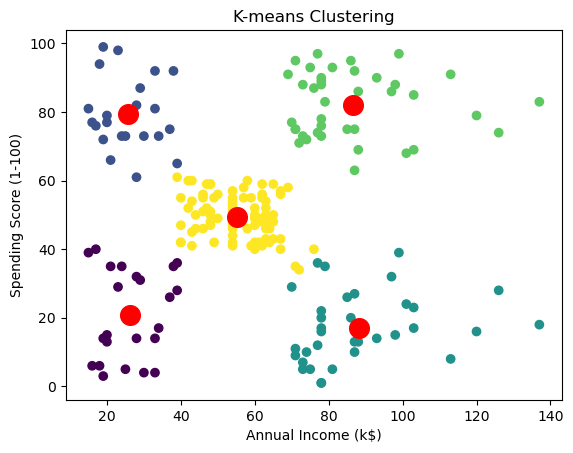

In [237]:
#Plot data points and centroids without decision boundary
plt.scatter(AI_SS[:,0], AI_SS[:,1], c=kmeanslabels, cmap='viridis')
plt.scatter(kmeanscentroids[:,0], kmeanscentroids[:,1], s=200, c='red')

plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

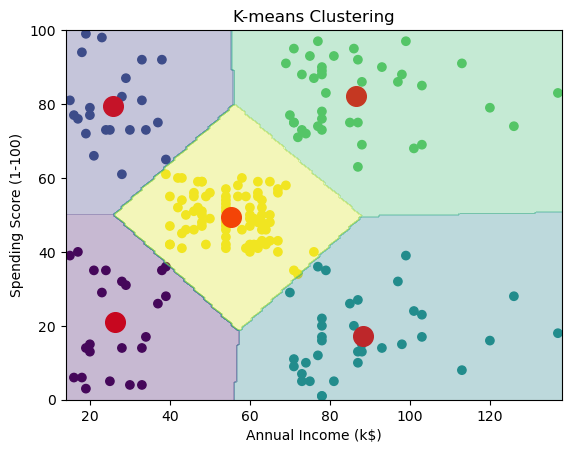

In [238]:
#Plot data points and centroids with decision boundary
plt.scatter(AI_SS[:,0], AI_SS[:,1], c=kmeanslabels, cmap='viridis')
plt.scatter(kmeanscentroids[:,0], kmeanscentroids[:,1], s=200, c='red')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Decision boundaries

plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

GMM Clustering

In [239]:
from sklearn.mixture import GaussianMixture

In [240]:
#Defining and fitting the GMM model

gmm = GaussianMixture(n_components=5, covariance_type='full') # 5 clusters again
gmm.fit(AI_SS)

#Retrieving the cluster labels
labels = gmm.predict(AI_SS)

In [241]:
# Create a mesh grid for decision boundary
x = np.linspace(AI_SS[:, 0].min() - 1, AI_SS[:, 0].max() + 1, 200)
y = np.linspace(AI_SS[:, 1].min() - 1, AI_SS[:, 1].max() + 1, 200)
xx, yy = np.meshgrid(x, y)
grid = np.c_[xx.ravel(), yy.ravel()]

In [242]:
# Evaluate probabilities for each cluster
probs = gmm.predict_proba(grid)
z = probs.argmax(axis=1)  # Assign cluster with highest probability
z = z.reshape(xx.shape)

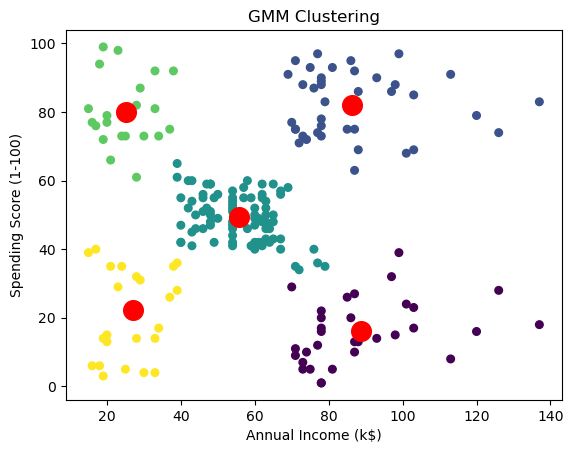

In [243]:
#Visualizing the results without decision boundary

plt.scatter(AI_SS[:, 0], AI_SS[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200)

plt.title('GMM Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()


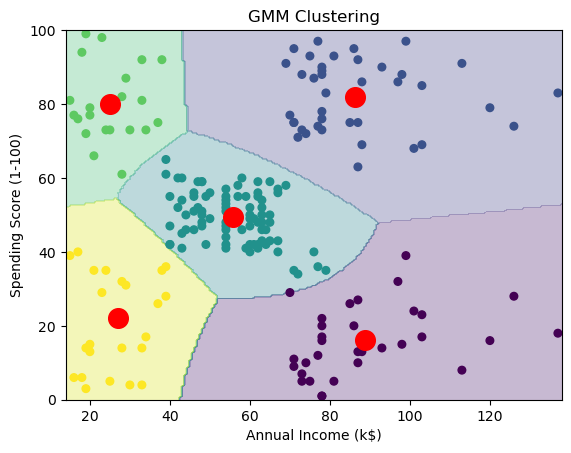

In [244]:
#Visualizing the results with decision boundary
plt.contourf(xx, yy, z, alpha=0.3, cmap='viridis')  # Cluster areas
plt.scatter(AI_SS[:, 0], AI_SS[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200)

plt.title('GMM Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

Adding results of K-Means clustering to the original dataset

Each customer of the mall has now been assigned into one of five categories. (K-means clustering labels) <br> 
Each category takes into account the customer's annual earnings and their spending score. <br> <br>
Each category roughly explained below. (For more precise explanations, please take a look at the K-means clustering plot) <br> <br>

0: High Annual income, high Spending score <br>
1: High Annual income, low Spending Score <br>
2: Medium Annual income, medium Spending Score <br>
3: Low Annual income, high Spending score <br>
4: Low Annual income, low Spending score <br> <br>

The mall can now create five unique marketing strategies, one for each customer category. <br> <br>

By adding these category labels to the original customer data, the mall can now target each customer with an adequate marketing strategy.

In [245]:
#Printing each customer category label before adding them to the data set
print(kmeanslabels)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 4 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 2 3 4 3 2 3 2 3 4 3 2 3 2 3 2 3 2 3 4 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [246]:
#Creating a new dataframe to keep the original untouched
df_new = df

#Adding 'Marketing group' column to the new data frame and assigning the 'kmeanslabels' as the values of the column
df_new['Marketing group'] = kmeanslabels

In [247]:
#Taking a look at the new dataset
#The values of the 'Marketing group' -column can be verified by comparing the Annual income, Spending Score and Marketing group values to the K-means clustering plot
df_new.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Marketing group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
5,6,Female,22,17,76,1
6,7,Female,35,18,6,0
7,8,Female,23,18,94,1
8,9,Male,64,19,3,0
9,10,Female,30,19,72,1
